In [259]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

## Zadanie 1

In [234]:
a = np.random.normal(0, 2, 20) # Faktyczne dane
b = np.random.normal(8, 5, 20) # Faktyczne dane
c = a * 3.25 # skalowanie
d = b * 2.23 # skalownaie
e = a * 2.66 # skalowanie
f = -3.14 * e # skalowanie
# ...

data = np.column_stack([a, b, c, d, e, f])
scaler = StandardScaler()
data = scaler.fit_transform(data)

pca = PCA()
data_t = pca.fit_transform(data)

print(np.around(pca.explained_variance_ratio_, decimals=3))

[0.692 0.308 0.    0.    0.    0.   ]


Powyższy przykład pokazuje, że możliwe jest osiągnięcie sytuacji gdzie dwie komponenty objaśniają 100% wariancji 50D danych.

## Zadanie 2

In [54]:
iris = load_iris().data
scaler = StandardScaler()
iris_std = scaler.fit_transform(iris)

pca = PCA(n_components=None)
iris_pca = pca.fit_transform(iris_std)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Widać, że już dwie pierwsze komponenty dobrze objaśniają dane. Wygląda na to, że pozostałe dwie komponenty są z nimi skorelowane.

In [15]:
print(pca.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


## Zadanie 3

In [262]:
faces = fetch_lfw_people(min_faces_per_person = 60)

In [263]:
pca = PCA(n_components = 150, whiten = True, random_state = 42)
faces_pca = pca.fit_transform(faces.data)

print(f"Procent wariancji dla 150 wymiarów: {round(np.sum(pca.explained_variance_ratio_) * 100, 3)} %")

Procent wariancji dla 150 wymiarów: 92.165 %


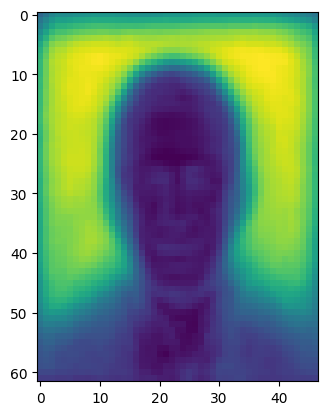

In [264]:
first = pca.components_[0]
first = first.reshape(62, 47)

plt.imshow(first)
plt.show()

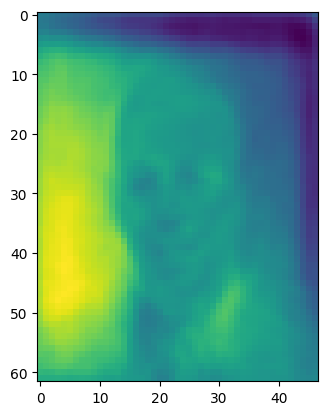

In [265]:
second = pca.components_[1]
second = second.reshape(62, 47)

plt.imshow(second)
plt.show()

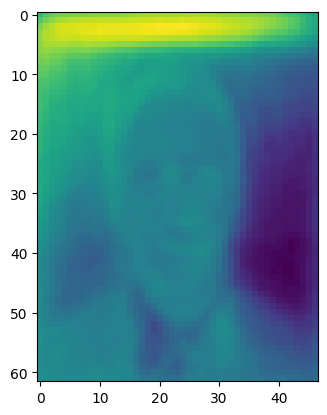

In [266]:
third = pca.components_[2]
third = third.reshape(62, 47)

plt.imshow(third)
plt.show()

Każdy z tych 62*47 wymiarowych wektorów ustawia zdjęcie twarzy w innej pozycji w przestrzeni (tylu wymiarowej). Każdy fragment obrazu koresponduje z konkretną podprzestrzenią. Można też interpretować jasność fragmentów powstałych obrazów i na tej podstawie przewidywać gdzie konkretnie w przestrzeni znajduje się obraz.

## Zadanie 4

Czwarty sygnał (ten zawierający pełną mieszaninę sygnałów) jest wynikiem licznych interferencji - na etapie mieszania ginie część informacji o amplitudach. Przy rozplataniu sygnału na składowe nie da się odzyskać pełnej informacji o amplitudach. Stąd wyplecione sygnały pierwotne mają inne (w tym przypadku mniejsze) amplitudy. 